In [ ]:
# แปลงให้เกิดภาพขอบเพื่อนับ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(image, title=None, vmin=0, vmax=255):
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.title(title) 

### 1. Global Threshold

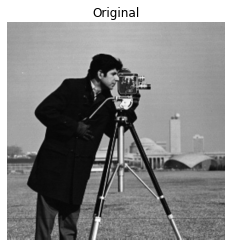

In [2]:
#โหลดภาพ
img_gray = plt.imread('img_grayscale.jpg')
show_image(img_gray, 'Original')

87


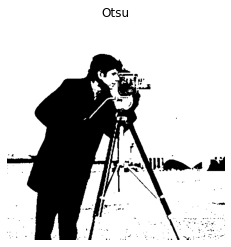

In [3]:
# คำนวณหาค่า threshold โดยใช้ Otsu's method 

# Import Otsu's threshold function
from skimage.filters import threshold_otsu

# คำนวณค่า threshold
thresh = threshold_otsu(img_gray)

# threshold
img_bw = img_gray > thresh

# แสดงผล
print(thresh)
show_image(img_bw, 'Otsu', vmin=0, vmax=1)

### 2. Local (Adaptive) threshold

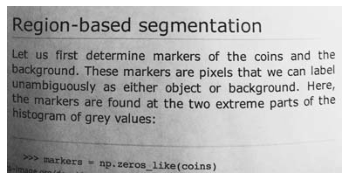

In [4]:
#ทดลองกับภาพที่สีของ background ไม่ค่อยคงที่
from skimage import data
img_page = data.page()
show_image(img_page)

**2.1 Global thresholding**

157


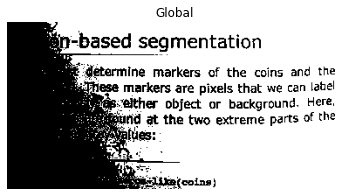

In [5]:
# คำนวณหาค่า threshold โดยใช้ Otsu's method 

# Import Otsu's threshold function
from skimage.filters import threshold_otsu

# คำนวณค่า threshold
thresh = threshold_otsu(img_page)

# threshold
img_bw_global = img_page > thresh

# แสดงผล
print(thresh)
show_image(img_bw_global, 'Global', vmin=0, vmax=1)

**2.2 Local thresholding**

(191, 384)
(191, 384)


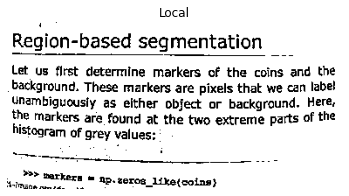

In [6]:
# คำนวณหาค่า local thresholds

# Import the local threshold function
from skimage.filters import threshold_local

# ตั้งค่าขนาดของ block ที่เราจะใช้ในการคำนวณ local threshold
block_size = 31

# คำนวณค่า local thresholds
local_thresh = threshold_local(img_page, block_size, offset=10)

# threshold
img_bw_local = img_page > local_thresh

# แสดงผล
print(img_page.shape)
print(local_thresh.shape)
show_image(img_bw_local, 'Local', vmin=0, vmax=1)

# แบบฝึกหัด

**ทดลอง segment รูปเหรียญ โดยใช้วิธี Global และ Local threshold**
<br> เติมคำสั่งในช่องว่างให้ถูกต้อง

### เฉลย

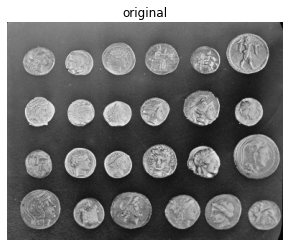

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(image, title=None, vmin=0, vmax=255):
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.title(title) 

#โหลดและแสดงรูปภาพ coins จาก skimage.data
from skimage import data
img_coins = data.coins()
show_image(img_coins, 'original')

(array([0.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 1.000e+01, 7.000e+00,
        1.000e+01, 2.700e+01, 1.600e+01, 1.400e+01, 1.700e+01, 1.300e+01,
        1.300e+01, 1.900e+01, 1.300e+01, 1.800e+01, 2.900e+01, 4.800e+01,
        6.800e+01, 9.600e+01, 1.200e+02, 1.730e+02, 2.390e+02, 3.190e+02,
        4.460e+02, 5.560e+02, 6.400e+02, 7.560e+02, 7.860e+02, 8.770e+02,
        9.650e+02, 1.069e+03, 1.061e+03, 1.149e+03, 1.186e+03, 1.147e+03,
        1.264e+03, 1.195e+03, 1.160e+03, 1.179e+03, 1.142e+03, 1.197e+03,
        1.154e+03, 1.163e+03, 1.089e+03, 1.085e+03, 1.100e+03, 1.061e+03,
        1.026e+03, 1.110e+03, 1.028e+03, 1.022e+03, 1.031e+03, 9.700e+02,
        1.003e+03, 1.023e+03, 9.710e+02, 9.560e+02, 9.880e+02, 9.010e+02,
        9.380e+02, 8.530e+02, 8.500e+02, 8.390e+02, 7.890e+02, 8.460e+02,
        8.050e+02, 8.290e+02, 8.280e+02, 8.470e+02, 8.570e+02, 8.220e+02,
        7.690e+02, 7.900e+02, 7.160e+02, 7.050e+02, 6.950e+02, 6.640e+02,
        6.640e+02, 6.210e+02, 6.000e+0

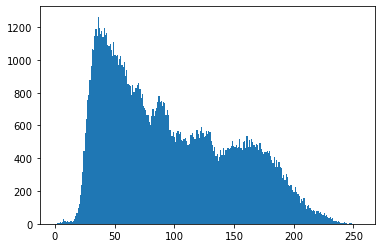

In [8]:
#ลองดู histogram
plt.hist(img_coins.ravel(), bins=256, range=(0,255))

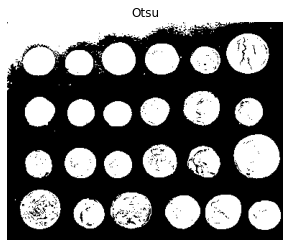

In [9]:
# 1. Global threshold : โดยใช้ Otsu's method
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img_coins)
img_otsu = img_coins > thresh
show_image(img_otsu, 'Otsu', vmin=0, vmax=1)

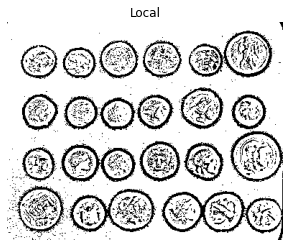

In [10]:
# 2. Local threshold
from skimage.filters import threshold_local

block_size = 19
local_thresh = threshold_local(img_coins, block_size, offset=10)
img_local = img_coins > local_thresh
show_image(img_local, 'Local', vmin=0, vmax=1)

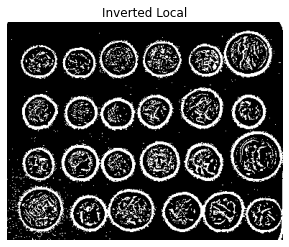

In [11]:
#แสดงภาพ invert
show_image(1-img_local, 'Inverted Local', vmin=0, vmax=1)